<a href="https://colab.research.google.com/github/ad6mi8/zomato/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non

<ipython-input-5-27dfa2b489ac>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='rocket')


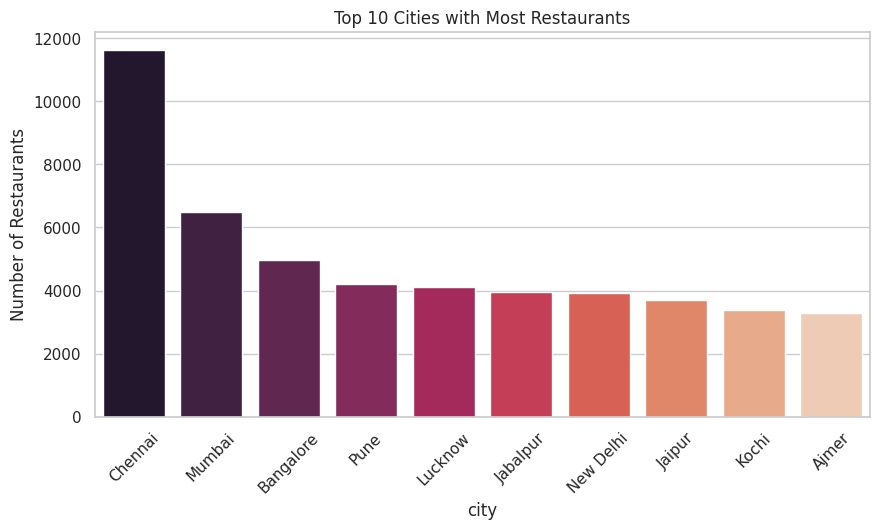

<ipython-input-5-27dfa2b489ac>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='coolwarm')


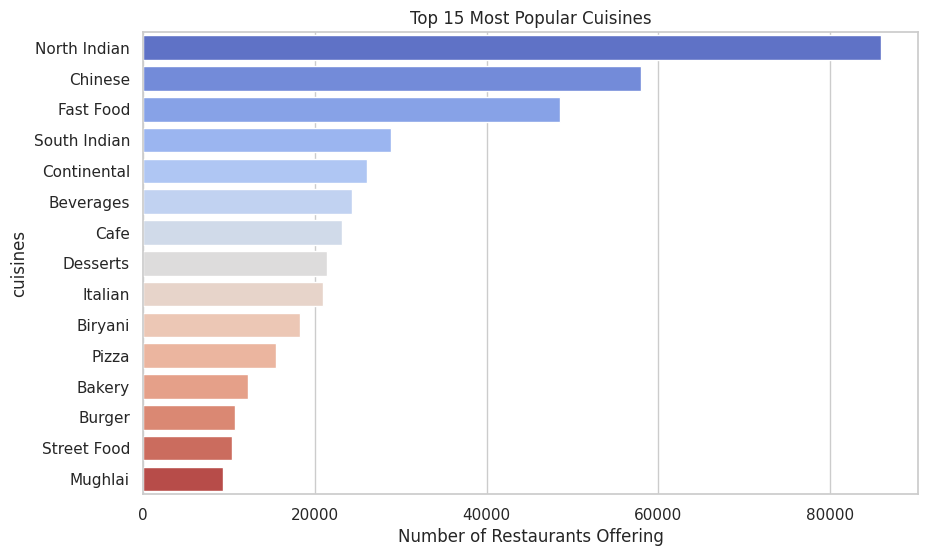

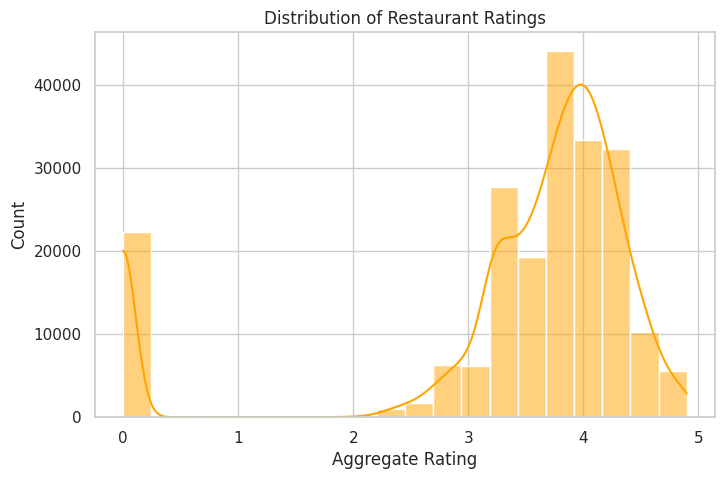

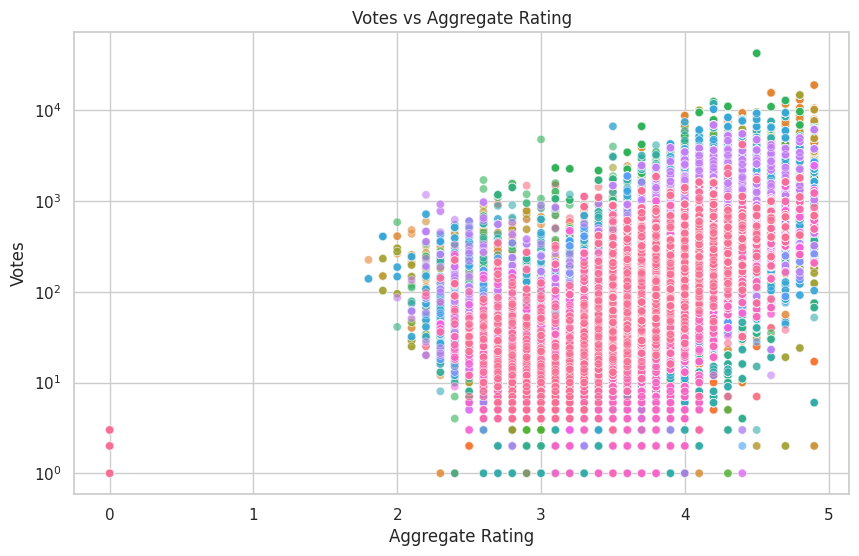

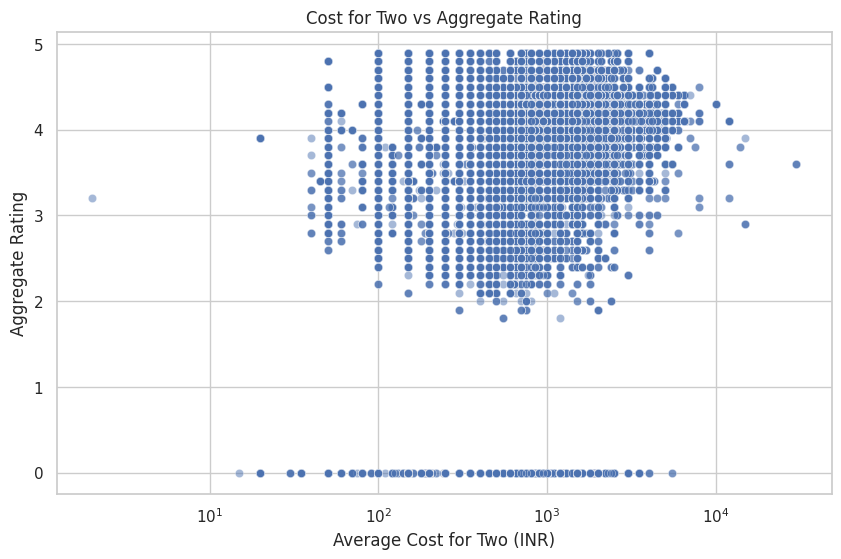

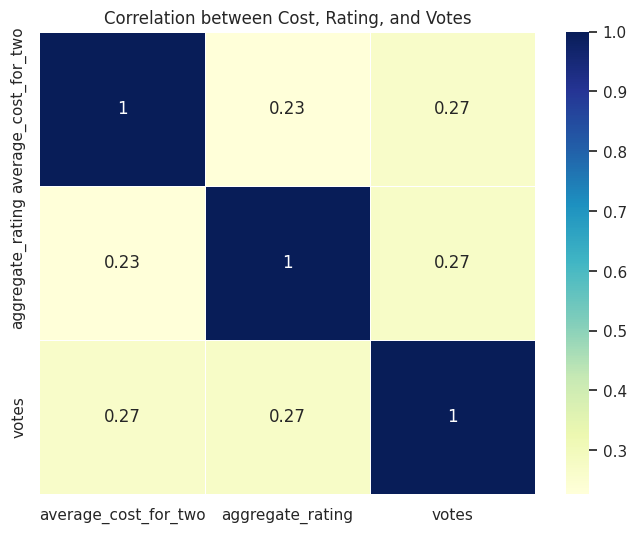

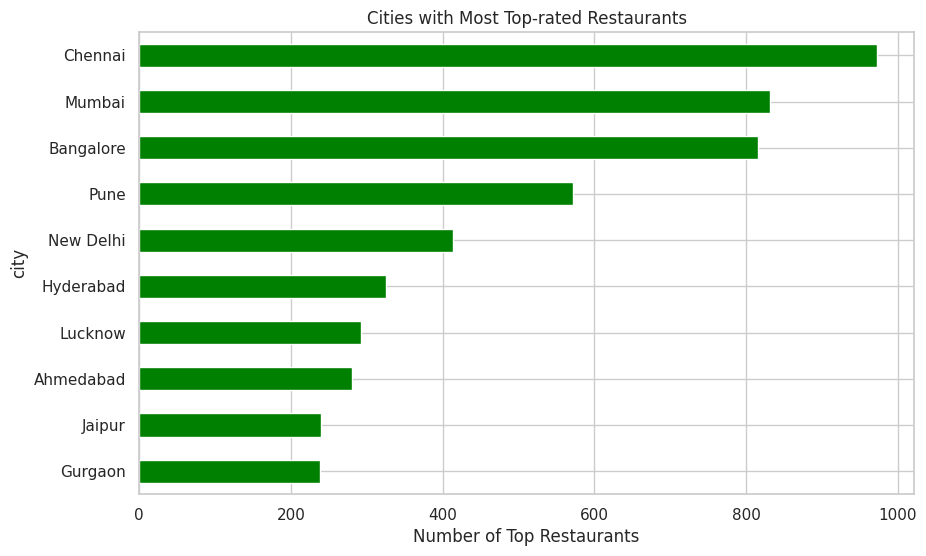

<ipython-input-5-27dfa2b489ac>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_city.values, y=avg_cost_city.index, palette='viridis')


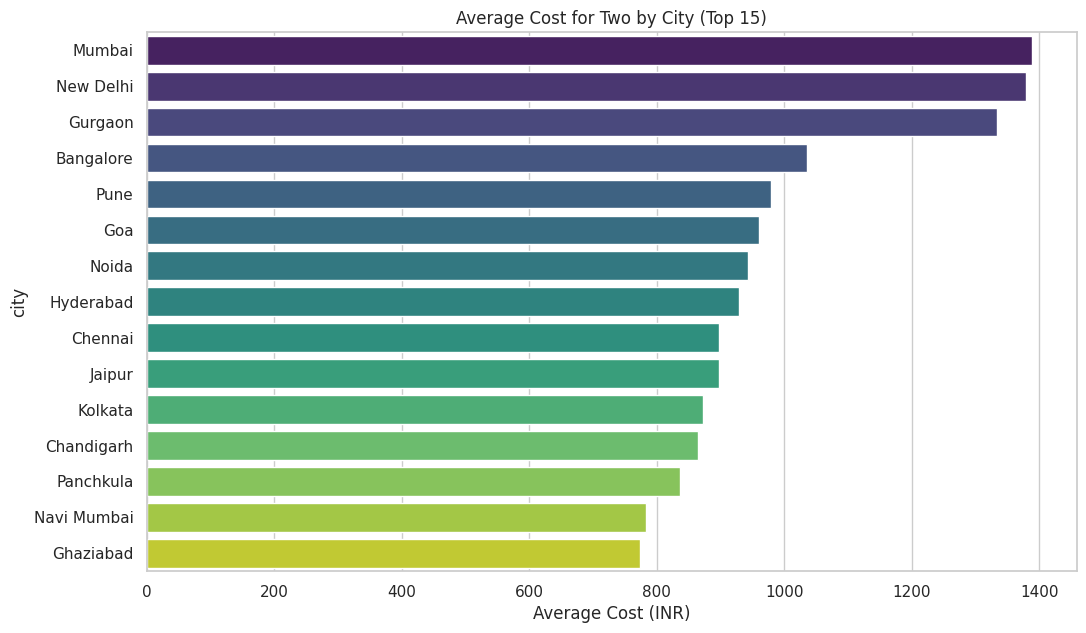


--- Top Cuisine Per City ---
city
Agra            North Indian
Ahmedabad       North Indian
Ajmer           North Indian
Alappuzha       South Indian
Allahabad       North Indian
Amravati        North Indian
Amritsar        North Indian
Aurangabad      North Indian
Bangalore       North Indian
Bhopal          North Indian
Bhubaneshwar    North Indian
Chandigarh      North Indian
Chennai         North Indian
Coimbatore      South Indian
Cuttack         North Indian
Name: cuisine_main, dtype: object


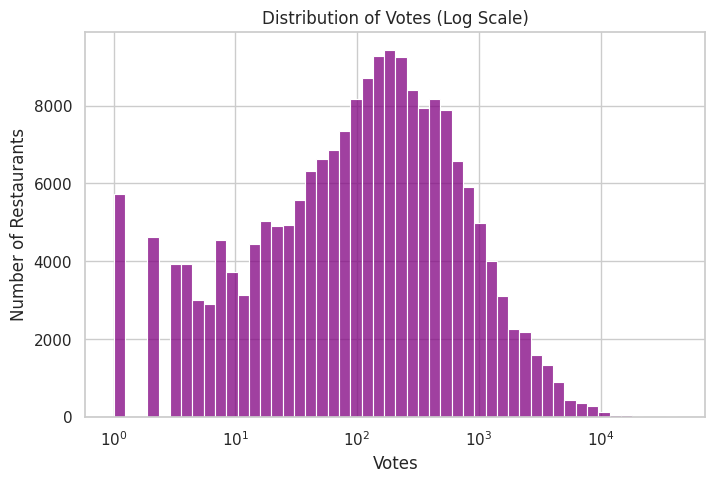

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Load data
file_path = '/content/zomato_restaurants_in_India.csv.zip'
df = pd.read_csv(file_path)

# Basic Information
print("\n--- Basic Info ---")
print(df.info())
print("\n--- Null Values ---")
print(df.isnull().sum())

# Cleaning: Drop unneeded columns (if they exist)
cols_to_drop = ['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

# Handle missing values
df = df.dropna(subset=['cuisines', 'aggregate_rating', 'votes', 'average_cost_for_two'])

# Reset index
df.reset_index(drop=True, inplace=True)

# -------- IN-DEPTH ANALYSIS --------

# 1. Top Cities by Number of Restaurants
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='rocket')
plt.title('Top 10 Cities with Most Restaurants')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# 2. Cuisine Popularity Overall
cuisine_series = df['cuisines'].dropna().str.split(',').explode().str.strip()
top_cuisines = cuisine_series.value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='coolwarm')
plt.title('Top 15 Most Popular Cuisines')
plt.xlabel('Number of Restaurants Offering')
plt.show()

# 3. Distribution of Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

# 4. Votes vs Aggregate Rating (Popularity vs Quality)
plt.figure(figsize=(10,6))
sns.scatterplot(x='aggregate_rating', y='votes', data=df, hue='city', alpha=0.6)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.yscale('log')  # votes can be very skewed
plt.legend([],[], frameon=False)
plt.show()

# 5. Cost vs Rating Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=df, alpha=0.5)
plt.title('Cost for Two vs Aggregate Rating')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Aggregate Rating')
plt.xscale('log')  # Cost varies greatly; log scale helps
plt.show()

# 6. Heatmap of Numeric Features
numeric_cols = ['average_cost_for_two', 'aggregate_rating', 'votes']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation between Cost, Rating, and Votes')
plt.show()

# 7. Top Restaurants per City (based on Rating > 4.5 and Votes > 100)
top_restaurants = df[(df['aggregate_rating'] > 4.5) & (df['votes'] > 100)]
top_city_restaurants = top_restaurants.groupby('city')['name'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
top_city_restaurants.head(10).plot(kind='barh', color='green')
plt.title('Cities with Most Top-rated Restaurants')
plt.xlabel('Number of Top Restaurants')
plt.gca().invert_yaxis()
plt.show()

# 8. Average Cost for Two by City
avg_cost_city = df.groupby('city')['average_cost_for_two'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,7))
sns.barplot(x=avg_cost_city.values, y=avg_cost_city.index, palette='viridis')
plt.title('Average Cost for Two by City (Top 15)')
plt.xlabel('Average Cost (INR)')
plt.show()

# 9. Top Cuisine per City
cuisine_per_city = df.copy()
cuisine_per_city['cuisine_main'] = cuisine_per_city['cuisines'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else np.nan)

top_cuisine_city = cuisine_per_city.groupby('city')['cuisine_main'].agg(lambda x: x.value_counts().index[0])

print("\n--- Top Cuisine Per City ---")
print(top_cuisine_city.head(15))

# 10. Votes Distribution (Popularity)
plt.figure(figsize=(8,5))
sns.histplot(df['votes'], bins=50, color='purple', log_scale=True)
plt.title('Distribution of Votes (Log Scale)')
plt.xlabel('Votes')
plt.ylabel('Number of Restaurants')
plt.show()
